#### 01-linearregression

Implement a linear model for predicting the amount of the tip
(tip) for a restaurant meal according to problem 7.1 Tips, pp 153.

                            OLS Regression Results                            
Dep. Variable:               tip_rate   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     4.796
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           1.76e-05
Time:                        14:39:06   Log-Likelihood:                 354.88
No. Observations:                 244   AIC:                            -691.8
Df Residuals:                     235   BIC:                            -660.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1935      0.020      9.775   

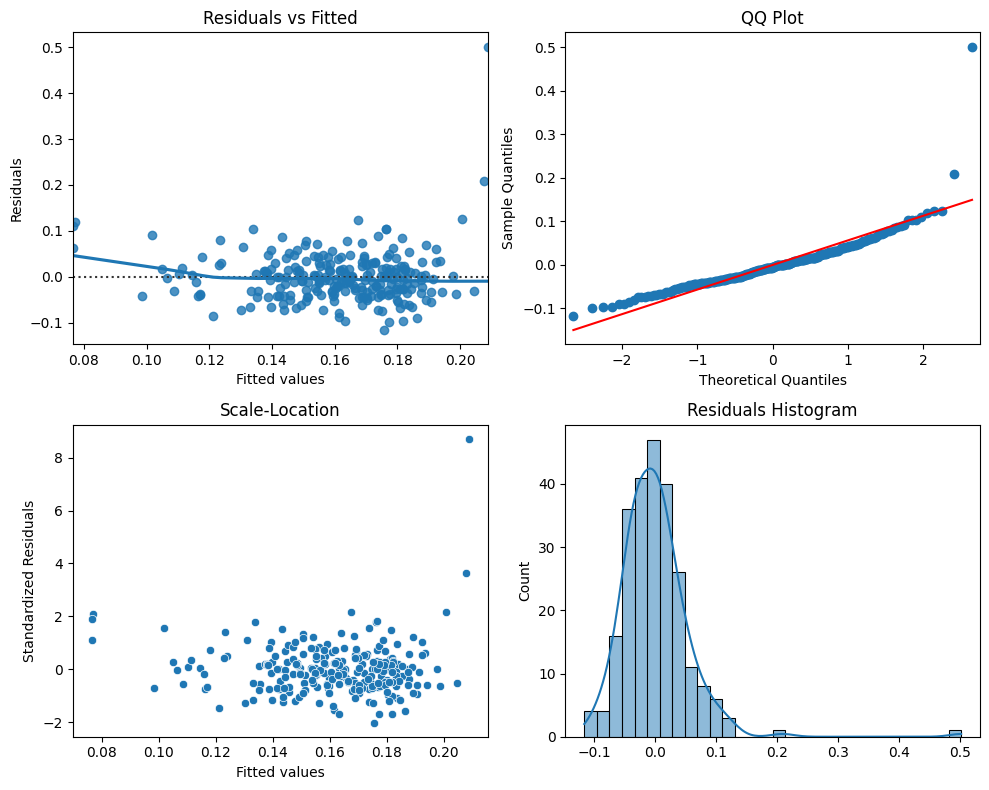

In [27]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
tips = pd.read_csv("/content/tips.csv", sep=",", header=0)

# Check if data needs to be split into multiple columns
if tips.shape[1] == 1:
    tips = tips.iloc[:, 0].str.split(",", expand=True)
    tips.columns = ["total_bill", "tip", "sex", "smoker", "day", "time", "size"]

# Convert necessary columns to numeric, using errors='coerce' to handle non-numeric entries
tips['total_bill'] = pd.to_numeric(tips['total_bill'], errors='coerce')
tips['tip'] = pd.to_numeric(tips['tip'], errors='coerce')
tips['size'] = pd.to_numeric(tips['size'], errors='coerce')

# Calculate tip rate
tips['tip_rate'] = tips['tip'] / tips['total_bill']

# Convert categorical variables to 'category' dtype
tips['sex'] = tips['sex'].astype('category')
tips['smoker'] = tips['smoker'].astype('category')
tips['day'] = tips['day'].astype('category')
tips['time'] = tips['time'].astype('category')

# Drop rows with NaN values in 'tip_rate' or any features used in the model
tips.dropna(subset=['tip_rate', 'total_bill', 'size'], inplace=True)

# Prepare data for modeling
X = tips[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical variables

# Convert boolean columns to int
X = X.astype(int)  # Ensures all columns are int

# Adds a constant term to the predictor
X = sm.add_constant(X)

# Define the target variable
y = tips['tip_rate']

# Ensure y is a numeric type
y = y.astype(float)

# Fit the model
model = sm.OLS(y, X).fit()  # Fit the model

# Summary of the model
print(model.summary())

# Diagnostics: Residual plot
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Residuals vs Fitted
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, ax=axs[0, 0])
axs[0, 0].set_title('Residuals vs Fitted')
axs[0, 0].set_xlabel('Fitted values')
axs[0, 0].set_ylabel('Residuals')

# QQ Plot
sm.qqplot(model.resid, line='s', ax=axs[0, 1])
axs[0, 1].set_title('QQ Plot')

# Scale-Location Plot
sns.scatterplot(x=model.fittedvalues, y=model.resid_pearson, ax=axs[1, 0])
axs[1, 0].set_title('Scale-Location')
axs[1, 0].set_xlabel('Fitted values')
axs[1, 0].set_ylabel('Standardized Residuals')

# Residuals Histogram
sns.histplot(model.resid, bins=30, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Residuals Histogram')

plt.tight_layout()
plt.show()


#### 02-logisticregression

Apply a logistic regression model for discriminating between a
rock and a classical song (type) according to problem 7.12 Music,
pp. 171.

In [ ]:
# importing libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
# loading file
file_path = 'music-sub.csv'
df = pd.DataFrame(pd.read_csv(file_path))
df.head()

,Unnamed: 0,Artist,Type,LVar,LAve,LMax,LFEner,LFreq
0,Dancing Queen,Abba,Rock,17600755.6,-90.006867,29921,105.92095,59.57379
1,Knowing Me,Abba,Rock,9543020.9,-75.766719,27626,102.83616,58.48031
2,Take a Chance,Abba,Rock,9049481.5,-98.062924,26372,102.32488,124.59397
3,Mamma Mia,Abba,Rock,7557437.3,-90.471062,28898,101.61648,48.76513
4,Lay All You,Abba,Rock,6282285.6,-88.952631,27940,100.30076,74.02039


In [ ]:
print(df.info())
print(df.shape)
print(df.describe)
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  62 non-null     object 
 1   Artist      62 non-null     object 
 2   Type        62 non-null     object 
 3   LVar        62 non-null     float64
 4   LAve        62 non-null     float64
 5   LMax        62 non-null     int64  
 6   LFEner      62 non-null     float64
 7   LFreq       62 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 4.0+ KB
None
(62, 8)
<bound method NDFrame.describe of        Unnamed: 0   Artist       Type        LVar       LAve   LMax  \
0   Dancing Queen     Abba       Rock  17600755.6 -90.006867  29921   
1      Knowing Me     Abba       Rock   9543020.9 -75.766719  27626   
2   Take a Chance     Abba       Rock   9049481.5 -98.062924  26372   
3       Mamma Mia     Abba       Rock   7557437.3 -90.471062  28898   
4     Lay All You     Ab

In [ ]:
print(df.isnull().sum())
df.drop(columns = 'Unnamed: 0', inplace=True)
print(df.isnull().sum())


Unnamed: 0    0
Artist        0
Type          0
LVar          0
LAve          0
LMax          0
LFEner        0
LFreq         0
dtype: int64
Artist    0
Type      0
LVar      0
LAve      0
LMax      0
LFEner    0
LFreq     0
dtype: int64


In [ ]:
df.head()

,Artist,Type,LVar,LAve,LMax,LFEner,LFreq
0,Abba,Rock,17600755.6,-90.006867,29921,105.92095,59.57379
1,Abba,Rock,9543020.9,-75.766719,27626,102.83616,58.48031
2,Abba,Rock,9049481.5,-98.062924,26372,102.32488,124.59397
3,Abba,Rock,7557437.3,-90.471062,28898,101.61648,48.76513
4,Abba,Rock,6282285.6,-88.952631,27940,100.30076,74.02039


In [ ]:
# Encode the 'Type' column: Classical = 0, Rock = 1
df['Type'] = df['Type'].map({'Classical': 0, 'Rock': 1})

# Define the features (X) and target (y)
X = df[['LVar', 'LAve', 'LMax', 'LFEner', 'LFreq']]  # Features
y = df['Type']  # Target (Type: 0=Classical, 1=Rock)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

ValueError: Input y contains NaN.

#### 03-LinR_LogR

Choose a data set of interest and apply **either** a linear
**or** a logistic regression model.

In [ ]:
# code